# Project 2

## Part 1 

In [232]:
import pandas as pd 
import numpy as np 
bc = pd.read_csv('data/project2.data')

In [233]:
# Identify shape, size of the raw data
bc.shape

(286, 10)

In [234]:
bc.size

2860

In [235]:
# Get info on datatypes
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [236]:
# Identify missing data and/or invalid values and treat them with suitable mean, median or mode 
bc

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [237]:
# You can see that there are '?' marks in these columns 
bc['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [238]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [239]:
# Node-caps and breast-quad location had "?" so they needed to be handled with the respective statistical method
# Replaced with mode or most common value seen in column
# Had GPT help replace the ? with the mode 
node_caps_mode = bc['node-caps'].mode()[0]
breast_quad_mode = bc['breast-quad'].mode()[0]
bc['node-caps'] = bc['node-caps'].replace('?', node_caps_mode)
bc['breast-quad'] = bc['breast-quad'].replace('?', breast_quad_mode)

Text(0.5, 1.0, 'Distribution of Age of Breast Cancer Patients')

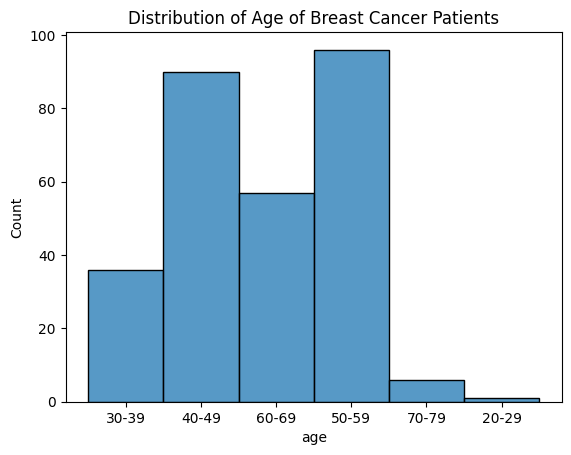

In [240]:
# Visualize the dataset through different univariate analysis and comment on your observations
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(data=bc['age'])
plt.title('Distribution of Age of Breast Cancer Patients')

Text(0.5, 1.0, 'Menopause Distribution')

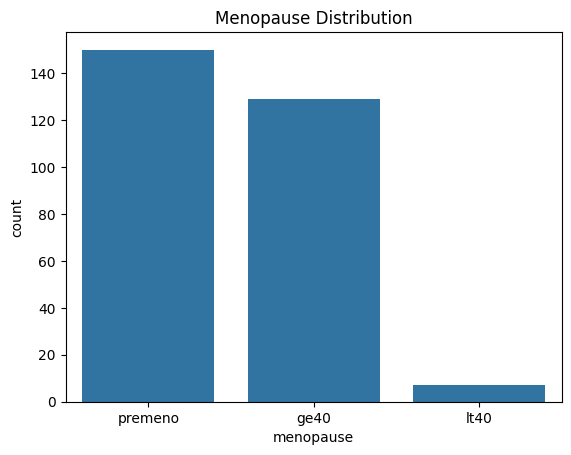

In [241]:
sns.countplot(x=bc['menopause'])
plt.title('Menopause Distribution')

Text(0.5, 1.0, 'Tumor Size Distribution')

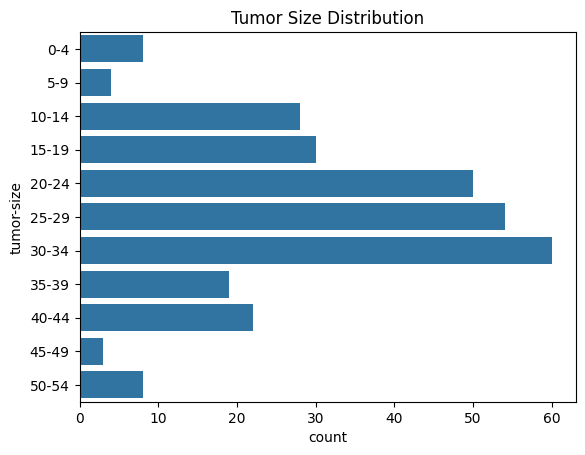

In [242]:
tumor_size_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
sns.countplot(data=bc['tumor-size'], order=tumor_size_order)
plt.title('Tumor Size Distribution')

Text(0.5, 1.0, 'Invasive Nodes Distribution')

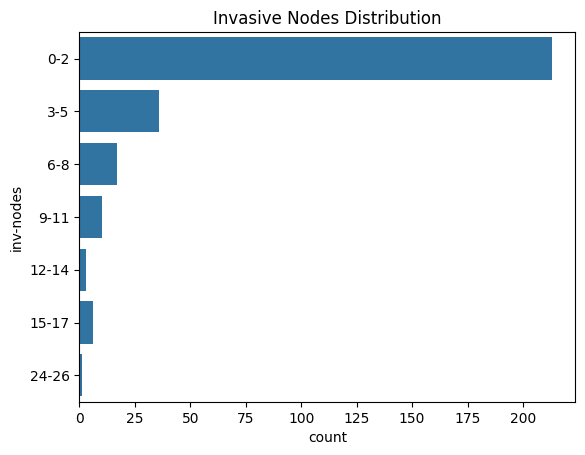

In [243]:
inv_nodes_order = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26']
sns.countplot(data=bc['inv-nodes'], order=inv_nodes_order)
plt.title('Invasive Nodes Distribution')

From looking at this plots, more people have breast cancer starting at age 30 up to 59, with the more frequent range between 40-59 years old. More people tend to have premeno and ge40 menopause compared to It40, which may be more predisposed to breast cancer. There is a higher frequency of people who have 'large' tumor sizes, with the tail ends being 10-14 and 40-44, with a higher bell curve around size 20-34. Finally, it seems that these large tumor sizes come within 0-2 counts, with more tumors such as 3 and above being in lesser frequency but still occuring amongst people. 

In [244]:
# Perform one-hot encoding on categorical variables
bc

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [245]:
bc['class'] = bc['class'].astype("category")
bc['age'] = bc['age'].astype("category")
bc['menopause'] = bc['menopause'].astype("category")
bc['tumor-size'] = bc['tumor-size'].astype("category")
bc['inv-nodes'] = bc['inv-nodes'].astype("category")
bc['node-caps'] = bc['node-caps'].astype("category")
bc['breast'] = bc['breast'].astype("category")
bc['breast-quad'] = bc['breast-quad'].astype("category")
bc['irradiat'] = bc['irradiat'].astype("category")
bc = pd.get_dummies(bc, columns=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)

## Part 2 

In [246]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   age_30-39                286 non-null    bool 
 3   age_40-49                286 non-null    bool 
 4   age_50-59                286 non-null    bool 
 5   age_60-69                286 non-null    bool 
 6   age_70-79                286 non-null    bool 
 7   menopause_lt40           286 non-null    bool 
 8   menopause_premeno        286 non-null    bool 
 9   tumor-size_10-14         286 non-null    bool 
 10  tumor-size_15-19         286 non-null    bool 
 11  tumor-size_20-24         286 non-null    bool 
 12  tumor-size_25-29         286 non-null    bool 
 13  tumor-size_30-34         286 non-null    bool 
 14  tumor-size_35-39         286 non-null    bool 
 15  tumor-

In [247]:
# Split the data into training and test datasets. 
# Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. 
import sklearn
import sklearn.linear_model 
from sklearn.model_selection import train_test_split

# Need to split into dependent (X) and independent (Y) 
# The independent variable is the recurrence of breast cancer 
X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [248]:
X_train.shape

(200, 31)

In [249]:
X_test.shape

(86, 31)

### K-Nearest Neighbor

In [250]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [251]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.69
Accuracy of knn on train data is : 0.86


It appears that from our inital KNN test, the accuracy of the test data was 69%, with the training data having 86%. This means that with more data, the model was able get more accurate clustering with a K = 3. 

In [252]:
# Now we want to find what the best K is to optimize the dataset to look for what amount of data clusters can best predict
# the recurrence of breast cancer 
# We use a grid search to find the optimal K 
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

In [253]:
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [254]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [255]:
print(f"The best hyperparameter value (N) for the best performing KNN model is: {knn_gscv.best_params_}")
print(f"Best KNN Recall: {knn_gscv.best_estimator_}")

The best hyperparameter value (N) for the best performing KNN model is: {'n_neighbors': 14}
Best KNN Recall: KNeighborsClassifier(n_neighbors=14)


From doing the KNN we can see that the best N neighbor value is 14. This means that the most optimized hyperparameter k that optimizes the recall and minimizes the number of false negatives (which we don't want to tell someone falsely they don't have breast cancer) is 14. We want to see now how the model did on the precision score, the F1 score and the recall score, which are 3 measures designed to help reduce false detections. 

In [256]:
from sklearn.metrics import classification_report
knn_predicted_y = knn.predict(X_test) 
print(classification_report(y_test, knn_predicted_y))

              precision    recall  f1-score   support

       False       0.75      0.82      0.78        60
        True       0.48      0.38      0.43        26

    accuracy                           0.69        86
   macro avg       0.62      0.60      0.60        86
weighted avg       0.67      0.69      0.68        86



### Improvement of KNN Recall Method to find best N Neighbor 

In [257]:
knn_search_recall = KNeighborsClassifier()
knn_gscv_best_recall = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring='recall')
knn_gscv_best_recall.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [258]:
knn_best_recall = knn_gscv_best_recall.best_estimator_ # finds optimal k for the best recall 

In [209]:
print(f"Top performing NN value: {knn_best_recall}")
knn_predicted_y_recall = knn_best_recall.predict(X_test) 
print(classification_report(y_test, knn_predicted_y_recall))

Top performing NN value: KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

       False       0.69      0.73      0.71        60
        True       0.27      0.23      0.25        26

    accuracy                           0.58        86
   macro avg       0.48      0.48      0.48        86
weighted avg       0.56      0.58      0.57        86



It appears that the best N neighbor is 1. 

### Decision Tree

In [266]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [267]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.72      0.82      0.77        60
        True       0.39      0.27      0.32        26

    accuracy                           0.65        86
   macro avg       0.55      0.54      0.54        86
weighted avg       0.62      0.65      0.63        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       141
        True       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



[Text(0.7375274122807017, 0.9705882352941176, 'x[24] <= 0.5\ngini = 0.416\nsamples = 200\nvalue = [141, 59]'),
 Text(0.5978618421052632, 0.9117647058823529, 'x[8] <= 0.5\ngini = 0.34\nsamples = 161\nvalue = [126, 35]'),
 Text(0.5803179824561403, 0.8529411764705882, 'x[21] <= 0.5\ngini = 0.375\nsamples = 140\nvalue = [105, 35]'),
 Text(0.4588815789473684, 0.7941176470588235, 'x[6] <= 0.5\ngini = 0.349\nsamples = 129\nvalue = [100, 29]'),
 Text(0.3059210526315789, 0.7352941176470589, 'x[0] <= 1.5\ngini = 0.337\nsamples = 126\nvalue = [99, 27]'),
 Text(0.05263157894736842, 0.6764705882352942, 'x[7] <= 0.5\ngini = 0.198\nsamples = 36\nvalue = [32, 4]'),
 Text(0.03508771929824561, 0.6176470588235294, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.07017543859649122, 0.6176470588235294, 'x[26] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.03508771929824561, 0.5588235294117647, 'x[3] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.017543859649122806, 0.5, '

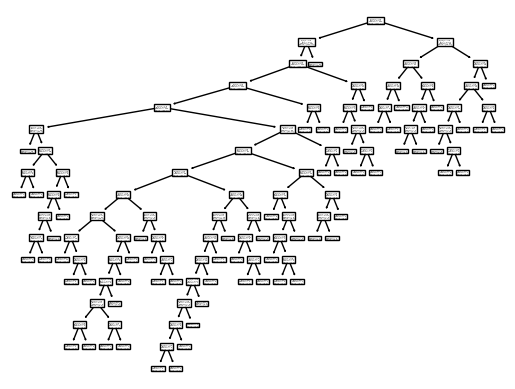

In [261]:
from sklearn import tree
tree.plot_tree(model)

### Random Forest 

In [284]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_


{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 12}

In [283]:
print("Performance on TEST\n*******************\n")
print(classification_report(y_test, gscv.predict(X_test), zero_division=1.0))
print("Performance on TRAIN\n********************\n")
print(classification_report(y_train, gscv.predict(X_train), zero_division=1.0))

Performance on TEST
*******************

              precision    recall  f1-score   support

       False       0.00      0.00      1.00        60
        True       0.29      0.96      0.45        26

    accuracy                           0.29        86
   macro avg       0.15      0.48      0.73        86
weighted avg       0.09      0.29      0.83        86

Performance on TRAIN
********************

              precision    recall  f1-score   support

       False       1.00      0.01      0.03       141
        True       0.30      1.00      0.46        59

    accuracy                           0.30       200
   macro avg       0.65      0.51      0.24       200
weighted avg       0.79      0.30      0.16       200



### Bonus

In [ ]:
# Find and implement a method that improves the model performance on the most important metric.

In [216]:
# Improving Recall via the Decision Threshold
knn.predict(X_test.iloc[0:10])
knn.predict_proba(X_test.iloc[0:10])

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ]])

In [ ]:
def modified_predict(y_probs, threshold):
    """
    Returns modified predictions for a collection of raw probabilities, `y_probs`
    given a decision threshold, `threshold`.
    """
    result = []
    # iterate over the raw probabilities
    for y in y_probs:
        # compare each one to the threshold
        if y >= threshold:
            result.append(1)
        else:
            result.append(0)
    return result
y_probs = knn.predict_proba(X_test)[0:10,1]
modified_predict(y_probs, 0.3)

In [ ]:
knn.predict(X_test.iloc[0:10])

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_for_threshold(X, y, model, threshold):
    # first, get the raw scores
    y_probs = model.predict_proba(X)[:,1]
    # then, get the modified labels
    y_modified_pred = modified_predict(y_probs, threshold)
    # print a simple confusion matrix as a pandas dataframe so that
    # we can label the rows and columns
    print(pd.DataFrame(confusion_matrix(y, y_modified_pred),
                    columns=['Predicted_False', 'Predicted_True'],
                    index=['Actual_False', 'Actual_True']))

In [ ]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.5)

In [ ]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.3)

In [ ]:
models = [knn, knn_gscv.best_estimator_, knn_gscv_best_recall.best_estimator_]
thresholds = [0.8, 0.5, 0.3]
for m in models:
    print(f"Model: {m}\n")
    for t in thresholds:
        print(f"threshold: {t}")
        confusion_matrix_for_threshold(X_test, y_test, m, t)

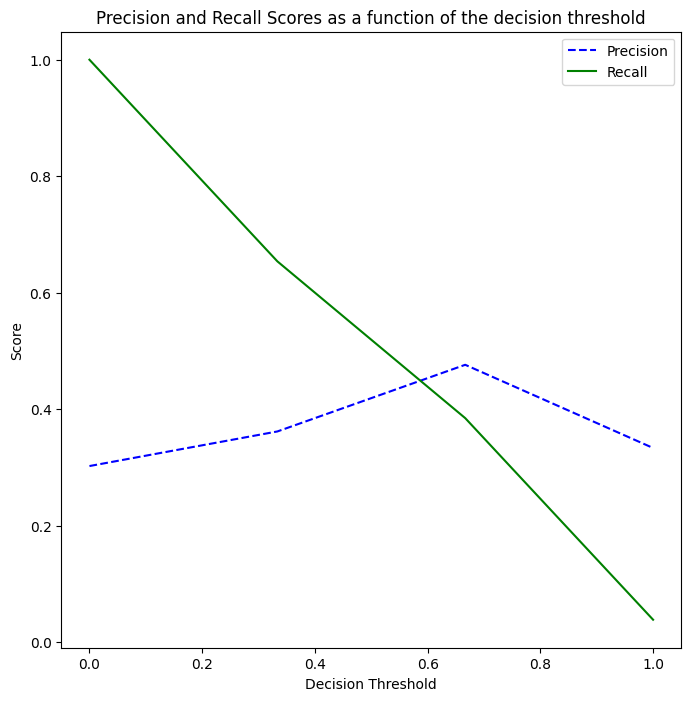

In [264]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
y_probs = knn.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)